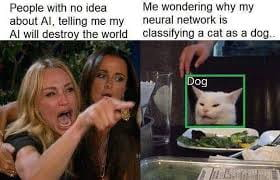

In [223]:
import jax
import jax.numpy as jnp
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def load_data(file):
    ds_train, ds_test  = [], []
    with open(file) as f:
        n_attributes = int(f.readline())
        n_train = int(f.readline())
        for _ in range(n_train):
            ds_train.append([float(a) for a in f.readline().split()])
        n_test = int(f.readline())
        for _ in range(n_test):
            ds_test.append([float(a) for a in f.readline().split()])
            
    return pd.DataFrame(ds_train), pd.DataFrame(ds_test)

In [3]:
def X_y_split(data, col):
    return data.drop(col, axis=1).values, data[col].values

In [4]:
train_data, test_data = load_data('data/1.txt')
print(train_data.shape, test_data.shape)

(1164, 429) (256, 429)


In [5]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,419,420,421,422,423,424,425,426,427,428
0,861813.0,-109689.0,-501867.0,299787.0,2720.0,-596749.0,95961.0,-43490.0,451227.0,994130.0,...,-947883.0,1065965.0,213248.0,1469971.0,-213545.0,2727628.0,6259280.0,-1042685.0,-138552.0,-6219662.0
1,734897.0,-109701.0,-501867.0,299787.0,2720.0,-596756.0,95864.0,46535.0,451227.0,994130.0,...,-111284.0,1065965.0,226791.0,1471724.0,-210350.0,2693318.0,6219628.0,-1042685.0,-138631.0,-4472740.0
2,893009.0,-109653.0,-501867.0,299787.0,2720.0,-596728.0,96258.0,-65515.0,451227.0,994130.0,...,-913285.0,1065965.0,195846.0,1490651.0,-175851.0,2704943.0,6223772.0,-1042685.0,-139484.0,-4250292.0
3,898311.0,-109683.0,-501867.0,299787.0,2720.0,-596745.0,96013.0,-69651.0,451227.0,994130.0,...,-1185096.0,1065965.0,183087.0,1508697.0,-142958.0,2759332.0,6305891.0,-1042685.0,-140297.0,-4055391.0
4,423466.0,-109710.0,-501867.0,299787.0,2720.0,-596761.0,95793.0,267483.0,451227.0,994130.0,...,-1579790.0,1065965.0,249500.0,1491797.0,-173762.0,2592164.0,6097935.0,-1042685.0,-139536.0,-3929017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,-1140045.0,-109666.0,-501867.0,299787.0,2720.0,-596736.0,96152.0,1376080.0,451227.0,994130.0,...,2213450.0,1065965.0,244103.0,1771122.0,335372.0,2083500.0,5497137.0,-1042685.0,-152122.0,28728629.0
1160,-1527101.0,-109679.0,-501867.0,299787.0,2720.0,-596743.0,96048.0,1650786.0,451227.0,994130.0,...,1275907.0,1065965.0,283033.0,1780077.0,351694.0,1949769.0,5332871.0,-1042685.0,-152526.0,29616679.0
1161,-1280786.0,-109702.0,-501867.0,299787.0,2720.0,-596757.0,95856.0,1475536.0,451227.0,994130.0,...,2233996.0,1065965.0,241648.0,1799090.0,386350.0,2093540.0,5526842.0,-1042685.0,-153383.0,30608872.0
1162,-908471.0,-109641.0,-501867.0,299787.0,2720.0,-596721.0,96364.0,1211354.0,451227.0,994130.0,...,1957978.0,1065965.0,175005.0,1834215.0,450374.0,2183722.0,5630057.0,-1042685.0,-154965.0,31885399.0


In [6]:
scaler = MinMaxScaler()
scaler.fit(train_data.values)

train_data = pd.DataFrame(scaler.transform(train_data.values))
test_data = pd.DataFrame(scaler.transform(test_data.values))

In [7]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,419,420,421,422,423,424,425,426,427,428
0,0.984952,0.380368,0.0,0.0,0.0,0.378947,0.380282,0.015206,0.0,0.0,...,0.149069,0.0,0.398622,0.000000,0.000000,0.960838,0.952097,0.0,1.000000,0.000000
1,0.932624,0.306748,0.0,0.0,0.0,0.305263,0.308377,0.067533,0.0,0.0,...,0.346425,0.0,0.478101,0.004763,0.004763,0.918457,0.911345,0.0,0.995236,0.043056
2,0.997814,0.601227,0.0,0.0,0.0,0.600000,0.600445,0.002404,0.0,0.0,...,0.157230,0.0,0.296496,0.056190,0.056190,0.932817,0.915604,0.0,0.943801,0.048539
3,1.000000,0.417178,0.0,0.0,0.0,0.421053,0.418829,0.000000,0.0,0.0,...,0.093109,0.0,0.221618,0.105223,0.105222,1.000000,1.000000,0.0,0.894778,0.053342
4,0.804221,0.251534,0.0,0.0,0.0,0.252632,0.255745,0.195958,0.0,0.0,...,0.000000,0.0,0.611372,0.059303,0.059304,0.793508,0.786278,0.0,0.940666,0.056457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,0.159584,0.521472,0.0,0.0,0.0,0.515789,0.521868,0.840328,0.0,0.0,...,0.894836,0.0,0.579699,0.818258,0.818258,0.165189,0.168821,0.0,0.181741,0.861361
1160,0.000000,0.441718,0.0,0.0,0.0,0.442105,0.444774,1.000000,0.0,0.0,...,0.673667,0.0,0.808166,0.842590,0.842589,0.000000,0.000000,0.0,0.157381,0.883249
1161,0.101556,0.300613,0.0,0.0,0.0,0.294737,0.302446,0.898136,0.0,0.0,...,0.899683,0.0,0.565292,0.894250,0.894250,0.177591,0.199349,0.0,0.105704,0.907703
1162,0.255062,0.674847,0.0,0.0,0.0,0.673684,0.679021,0.744581,0.0,0.0,...,0.834570,0.0,0.174187,0.989689,0.989689,0.288987,0.305426,0.0,0.010311,0.939165


In [8]:
y_i = 428
X_train, y_train = X_y_split(train_data, y_i)
X_test, y_test = X_y_split(test_data, y_i)

In [9]:
def plus_dim(X):
    return jnp.hstack((X, jnp.ones((X.shape[0], 1))))

class LinearRegression:
    def __init__(self, alpha=0.):
        self.alpha = alpha # regularization coeff
        self.w = None
    
    def fit(self, X, y):
        raise NotImplementedException()
    
    def predict(self, X):
        return jnp.matmul(plus_dim(X), self.w)

# Min Square Method with Lasso

In [10]:
class MSMLR(LinearRegression):
    def __init__(self, alpha=0.1):
        super().__init__(alpha)
    
    def fit(self, X, y):  # w = (X^TX)^-1X^Ty
        X = plus_dim(X)
        _, size = X.shape
        self.w = jnp.matmul(
            jnp.matmul(
                jnp.linalg.inv(jnp.matmul(jnp.transpose(X), X) + self.alpha * jnp.identity(size)),
                jnp.transpose(X)
            ),
            y
        )

# Gradient descent

## Functions to optimize

In [312]:
def mse(y, y_hat):
    return jnp.mean((y - y_hat)**2)

def smape(y, y_hat):
    return 2 * jnp.mean(jnp.abs(y_hat - y)) / jnp.mean(jnp.abs(y) + jnp.abs(y_hat))

def nrmse(y, y_hat):
    return jnp.mean(jnp.abs(y - y_hat) / jnp.std(y_hat))

## Regularization

In [294]:
def lasso(w):
    return jnp.linalg.norm(w, ord=1)

def l2(w):
    return jnp.linalg.norm(w, ord=2)

def none(_):
    return 0.

## Linear Regression

In [383]:
class GradientLR(LinearRegression):
    def __init__(self, err=mse, reg=none, alpha=0.1, iterations=2000, lr=0.5, clip=1000, seed=10, batch_size=2):
        super().__init__(alpha=alpha)
        self.err = err
        self.reg = reg
        self.iterations = iterations
        self.lr = lr
        self.clip = clip
        self.key = jax.random.PRNGKey(seed)
        self.batch_size = batch_size
        
    def __get_batch(self, X, y):
        if self.batch_size == X.shape[0]:
            return X, y
        indices = jax.random.choice(self.key, jnp.array(list(range(X.shape[0]))), shape=(self.batch_size,))
        self.key = jax.random.split(self.key, num=1)[0]
        return jnp.stack([X[i] for i in indices]), jnp.stack([y[i] for i in indices])
        
    def __opt(self, w, X, y):
        return self.err(jnp.matmul(plus_dim(X), w), y) + self.alpha *  self.reg(w)
    
    def fit(self, X, y):
        n, size = X.shape
        self.w = jax.random.uniform(self.key, (size + 1,), minval=-1/n, maxval=1/n)
        history = []
        for i in range(self.iterations):
            X_sample, y_sample = self.__get_batch(X, y)
            grad = jnp.clip(jax.grad(self.__opt)(self.w, X_sample, y_sample), -self.clip, self.clip)
            old_err = self.err(jnp.matmul(plus_dim(X_sample), self.w), y_sample)
            self.w = (1 - self.lr) * self.w - (self.lr) * grad
            new_err = self.err(jnp.matmul(plus_dim(X_sample), self.w), y_sample)
            history.append((1 - self.lr) * old_err + self.lr * new_err)
        return history

# Test

## 1. MSM Linear Regression 

In [14]:
def test_msm(train_set, test_set, alphas, err):
    X_train, y_train = train_set
    X_test, y_test = test_set
    errs = []
    for alpha in alphas:
        msm = MSMLR(alpha)
        msm.fit(X_train, y_train)
        preds = msm.predict(X_test)
        errs.append(err(preds, y_test))
    return errs

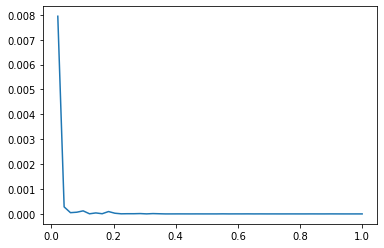

In [15]:
alphas = jnp.linspace(0., 1., num=50)
errs = test_msm((X_train, y_train), (X_test, y_test), alphas, mse)
plt.plot(alphas, errs)

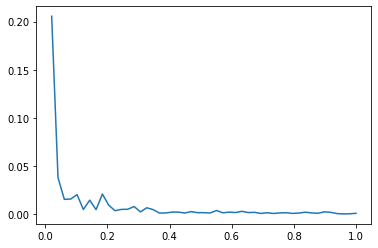

In [16]:
alphas = jnp.linspace(0., 1., num=50)
errs = test_msm((X_train, y_train), (X_test, y_test), alphas, smape)
plt.plot(alphas, errs)

## 2. Empirical risk

Text(0.5, 1.0, 'SMAPE')

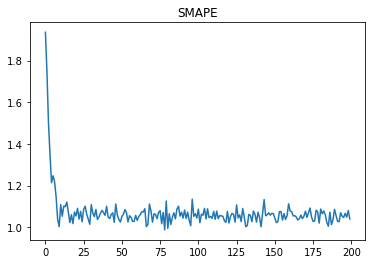

In [384]:
smape_gd = GradientLR(err=smape, reg=lasso, alpha=0.005, iterations=200, lr=0.2, clip=100000, batch_size=32)
history = smape_gd.fit(X_train, y_train)
plt.plot(list(range(200)), history)
plt.title('SMAPE')

Text(0.5, 1.0, 'MSE')

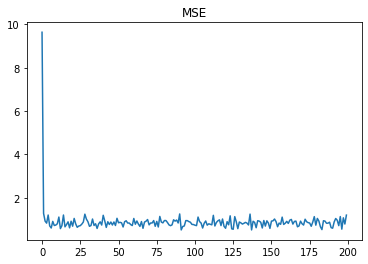

In [385]:
mse_gd = GradientLR(err=mse, reg=lasso, alpha=0.01, iterations=200, lr=0.2, clip=100000, batch_size=64)
history = mse_gd.fit(X_train, y_train)
plt.plot(list(range(200)), history)
plt.title('MSE')

## 3. NRMSE & SMAPE

In [266]:
msm = MSMLR(0.9)
msm.fit(X_train, y_train)
msm_p = msm.predict(X_test)

In [267]:
print(f'MSM :: NRMSE : {nrmse(msm_p, y_test)}, SMAPE: {smape(msm_p, y_test)}')

MSM :: NRMSE : 0.028365762904286385, SMAPE: 0.12088233232498169


In [386]:
smape_gd = GradientLR(err=smape, reg=lasso, alpha=0.005, iterations=400, lr=0.91, clip=100000, batch_size=128)
smape_gd.fit(X_train, y_train)
smape_p = smape_gd.predict(X_test)

In [387]:
print(f'SMAPE GD :: NRMSE : {nrmse(smape_p, y_test)}, SMAPE: {smape(smape_p, y_test)}')

SMAPE GD :: NRMSE : 0.5676661133766174, SMAPE: 1.0822192430496216


In [368]:
mse_gd = GradientLR(err=mse, reg=lasso, alpha=0.01, iterations=600, lr=0.9, clip=100000, batch_size=64)
mse_gd.fit(X_train, y_train)
mse_p = mse_gd.predict(X_test)

In [369]:
print(f'MSE GD :: NRMSE : {nrmse(mse_p, y_test)}, SMAPE: {smape(mse_p, y_test)}')

MSE GD :: NRMSE : 0.2558554708957672, SMAPE: 0.3776645362377167
